# Guided Project: Exploring Ebay Car Sales Data

- In this project, we will work with the dataset of used car from ***eBay Kleinanzeigen***, a classifieds section of the German eBay website
- The dataset was originally scraped and uploaded to Kaggle, you can find it [here](https://www.kaggle.com/orgesleka/used-cars-database/data)
- Some notifications:
    + The dataset was reduced 50,000 data points
    + The dataset was dirtied, to practice our cleaning data skill

- The data dictionary provided with data is as follows:

    - dateCrawled - When this ad was first crawled. All field-values are taken from this date
    - name - Name of the car.
    - seller - Whether the seller is private or a dealer.
    - offerType - The type of listing
    - price - The price on the ad to sell the car.
    - abtest - Whether the listing is included in an A/B test.
    - vehicleType - The vehicle Type.
    - yearOfRegistration - The year in which the car was first registered.
    - gearbox - The transmission type.
    - powerPS - The power of the car in PS.
    - model - The car model name.
    - kilometer - How many kilometers the car has driven.
    - monthOfRegistration - The month in which the car was first registered.
    - fuelType - What type of fuel the car uses.
    - brand - The brand of the car.
    - notRepairedDamage - If the car has a damage which is not yet repaired.
    - dateCreated - The date on which the eBay listing was created.
    - nrOfPictures - The number of pictures in the ad.
    - postalCode - The postal code for the location of the vehicle.
    - lastSeenOnline - When the crawler saw this ad last online.

- The aim of this project is to clean the data and analyze the included used car listings, and practice using pandas library

## Introduction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

In [2]:
autos = pd.read_csv("autos.csv", encoding="Latin-1")

In [3]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

- The dataset has total 20 clumns, with 50.000 rows, but there are some columns was lost data: vehicleType, gearbox, model, fuelType, notRepairedDamage.
- We'll have a look at this lost data

In [4]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


- There are many data points have special characters, and useless such as: km, $, /,...
- The columns name also not in the same type, uppercase and lowercase mix

In [5]:
autos.describe()

,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [6]:
autos["nrOfPictures"].unique()

array([0], dtype=int64)

=> The nrOfPictures columns is a useless attribute fill with 0 values, so we will delete this column

In [7]:
#check for NaN values
print(f"There are: {autos.isna().sum().sum()} NaN values")
print(f"It take about {autos.isna().sum().sum() / autos.shape[0] * 100}% of data")

There are: 24844 NaN values
It take about 49.688% of data


In [8]:
#Drop Nan values
autos.dropna(inplace=True)
autos.isna().sum()
print(f"There are {autos.shape[0]} row left")

There are 35047 row left


In [9]:
#Drop nrOfPictures columns which contains all 0 value
autos = autos.drop(columns=["nrOfPictures"])
autos.shape

(35047, 19)

## Cleaning Columns Name

In [10]:
#convert some strings name, and lowercase
autos = autos.rename(columns={"dateCrawled" : "date_crawled", "lastSeen" : "last_seen", "yearOfRegistration" : "registration_year", "monthOfRegistration" : "registration_month", "notRepairedDamage" : "unrepaired_damage", "dateCreated" : "ad_created"})
autos = autos.rename(str.lower, axis="columns")
autos.columns

Index(['date_crawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'registration_year', 'gearbox', 'powerps', 'model',
       'odometer', 'registration_month', 'fueltype', 'brand',
       'unrepaired_damage', 'ad_created', 'postalcode', 'last_seen'],
      dtype='object')

In [11]:
autos.head()

,date_crawled,name,seller,offertype,price,abtest,vehicletype,registration_year,gearbox,powerps,model,odometer,registration_month,fueltype,brand,unrepaired_damage,ad_created,postalcode,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


=> All columns name are now rename and change to lowercase, to convenience for processing data so we need to do this, and futher meaningful columns name

## Initial Exploration and Cleaning

In [12]:
#Have a look to dataset
autos.describe(include="all")
autos = autos.drop(columns=["seller", "offertype"])


- Because the column seller, offertype only have one value so this is a useless attribute, delete it

In [13]:
autos.describe(include="all")

,date_crawled,name,price,abtest,vehicletype,registration_year,gearbox,powerps,model,odometer,registration_month,fueltype,brand,unrepaired_damage,ad_created,postalcode,last_seen
count,35047,35047,35047,35047,35047,35047.000000,35047,35047.000000,35047,35047,35047.000000,35047,35047,35047,35047,35047.000000,35047
unique,34121,25844,2151,2,8,NaN,2,NaN,242,13,NaN,7,39,2,67,NaN,28842
top,2016-04-04 16:40:33,Volkswagen_Golf_1.4,"$1,500",test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,74,482,18081,10225,NaN,26957,NaN,2797,21620,NaN,22638,7239,31207,1401,NaN,7
mean,NaN,NaN,NaN,NaN,NaN,2003.351014,NaN,127.414843,NaN,NaN,6.171826,NaN,NaN,NaN,NaN,51778.672183,NaN
std,NaN,NaN,NaN,NaN,NaN,6.457460,NaN,182.485798,NaN,NaN,3.471734,NaN,NaN,NaN,NaN,25809.177709,NaN
min,NaN,NaN,NaN,NaN,NaN,1931.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,80.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,31199.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,2004.000000,NaN,116.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,51063.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,72760.000000,NaN


- Column: name, price, odometer, registration_year, registration_month, ad_created, ad_created, postalcode, lastseen need to be investigate more and convert to suitable type string to int or datetime
- Columns price and odemeter is a numerical type but it is string now, with non-numericals character, need to transform it. 

In [14]:
autos["odometer"] = autos["odometer"].str.replace(",", "").str.replace("km", "").astype(int)
autos["price"] = autos["price"].str.replace(",", "").str.replace("$", "").astype(int)
autos = autos.rename(columns={"odometer" : "odometer_km"})

## Exploring the Odometer and Price Columns

In [15]:
print(autos["odometer_km"].shape)
autos["odometer_km"].describe()

(35047,)


count     35047.000000
mean     124172.825063
std       39725.783587
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

c:\users\huy\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


125000    3946
100000    1637
90000     1390
80000     1171
70000      997
60000      969
50000      864
40000      676
30000      643
20000      606
5000       341
10000      187
Name: odometer_km, dtype: int64

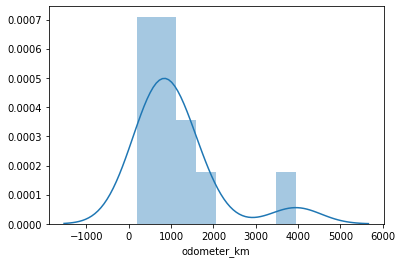

In [16]:
seri = autos["odometer_km"].value_counts()[1:]
sns.distplot(seri)
seri

We can see that the values in this field are rounded, which might indicate that sellers had to choose from pre-set options for this field. Additionally, there are more high mileage than low mileage vehicles.

In [17]:
print(autos["price"].unique().shape)
print(autos["price"].describe())
print(autos["price"].value_counts().head(20))

(2151,)
count    3.504700e+04
mean     7.442565e+03
std      8.949139e+04
min      0.000000e+00
25%      1.500000e+03
50%      3.800000e+03
75%      8.600000e+03
max      1.234568e+07
Name: price, dtype: float64
1500    482
500     475
0       458
2500    417
1200    381
1000    372
3500    349
600     314
800     295
2000    282
4500    273
999     273
750     261
850     260
5500    256
2200    253
950     244
1800    244
3000    238
1999    237
Name: price, dtype: int64


In [18]:
autos["price"].value_counts().sort_index(ascending=True).head(20)

0      458
1       36
11       1
13       1
47       1
50      15
60       2
65       1
66       1
70       1
75       1
79       1
80       6
90       3
99       5
100     52
110      1
117      1
120     10
125      3
Name: price, dtype: int64

In [19]:
autos["price"].value_counts().sort_index(ascending=False).head(20)

12345678    1
11111111    1
999999      1
999990      1
350000      1
299000      1
295000      1
265000      1
259000      1
220000      1
198000      1
190000      1
180000      1
175000      1
169999      1
169000      1
163991      1
163500      1
151990      1
145000      1
Name: price, dtype: int64

- The maximum price is 12,5 million dollars, while 0 dollars take 458 cars, take about 2% of this dataset, so we might be delete these rows. There are 2151 unique price for cars, as we can see above, from 350k$ up, the price increase steadily and then jump up to less realistic numbers.
- So we will set data between 1 and 350,000.

In [20]:
autos = autos[autos["price"].between(1,350000)]
autos["price"].describe()

count     34585.000000
mean       6805.921324
std        9528.598736
min           1.000000
25%        1590.000000
50%        3900.000000
75%        8750.000000
max      350000.000000
Name: price, dtype: float64

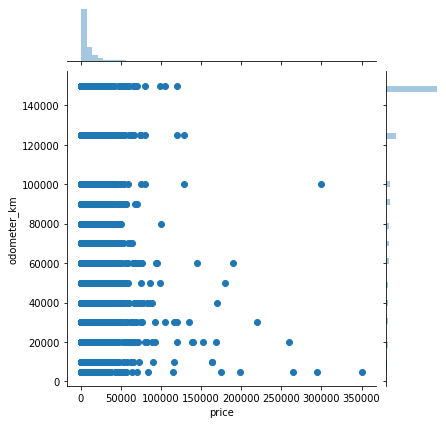

In [21]:
x = autos["price"].value_counts().head(20)
sns.jointplot(x="price", y="odometer_km", data=autos)

## Exploring the date columns

In [22]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34585 entries, 0 to 49999
Data columns (total 17 columns):
date_crawled          34585 non-null object
name                  34585 non-null object
price                 34585 non-null int32
abtest                34585 non-null object
vehicletype           34585 non-null object
registration_year     34585 non-null int64
gearbox               34585 non-null object
powerps               34585 non-null int64
model                 34585 non-null object
odometer_km           34585 non-null int32
registration_month    34585 non-null int64
fueltype              34585 non-null object
brand                 34585 non-null object
unrepaired_damage     34585 non-null object
ad_created            34585 non-null object
postalcode            34585 non-null int64
last_seen             34585 non-null object
dtypes: int32(2), int64(4), object(11)
memory usage: 4.5+ MB


There are 5 columns that indicates to date (date_crawled, registration_year, registration_month, ad_created, last_seen). But registration_year, registration_month is numericals, others is string so we no need to process it for further compute. Let's process three columns left

In [23]:
autos[["date_crawled", "ad_created", "last_seen"]].head(5)

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [24]:
(autos["date_crawled"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

2016-03-05    0.025213
2016-03-06    0.014168
2016-03-07    0.036779
2016-03-08    0.032471
2016-03-09    0.032268
2016-03-10    0.032008
2016-03-11    0.033194
2016-03-12    0.037299
2016-03-13    0.016279
2016-03-14    0.035738
2016-03-15    0.033916
2016-03-16    0.028625
2016-03-17    0.030447
2016-03-18    0.013127
2016-03-19    0.034668
2016-03-20    0.038282
2016-03-21    0.037097
2016-03-22    0.032326
2016-03-23    0.032789
2016-03-24    0.028423
2016-03-25    0.030186
2016-03-26    0.032789
2016-03-27    0.031256
2016-03-28    0.034321
2016-03-29    0.034726
2016-03-30    0.034350
2016-03-31    0.031690
2016-04-01    0.034379
2016-04-02    0.036172
2016-04-03    0.039815
2016-04-04    0.038022
2016-04-05    0.012983
2016-04-06    0.003007
2016-04-07    0.001185
Name: date_crawled, dtype: float64

In [25]:
(autos["date_crawled"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_values()
        )

2016-04-07    0.001185
2016-04-06    0.003007
2016-04-05    0.012983
2016-03-18    0.013127
2016-03-06    0.014168
2016-03-13    0.016279
2016-03-05    0.025213
2016-03-24    0.028423
2016-03-16    0.028625
2016-03-25    0.030186
2016-03-17    0.030447
2016-03-27    0.031256
2016-03-31    0.031690
2016-03-10    0.032008
2016-03-09    0.032268
2016-03-22    0.032326
2016-03-08    0.032471
2016-03-23    0.032789
2016-03-26    0.032789
2016-03-11    0.033194
2016-03-15    0.033916
2016-03-28    0.034321
2016-03-30    0.034350
2016-04-01    0.034379
2016-03-19    0.034668
2016-03-29    0.034726
2016-03-14    0.035738
2016-04-02    0.036172
2016-03-07    0.036779
2016-03-21    0.037097
2016-03-12    0.037299
2016-04-04    0.038022
2016-03-20    0.038282
2016-04-03    0.039815
Name: date_crawled, dtype: float64

Look like this data was crawled everyday through March to April

In [26]:
(autos["ad_created"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

2015-08-10    0.000029
2015-09-09    0.000029
2015-11-10    0.000029
2015-12-05    0.000029
2015-12-30    0.000029
                ...   
2016-04-03    0.039902
2016-04-04    0.038311
2016-04-05    0.011855
2016-04-06    0.003123
2016-04-07    0.001012
Name: ad_created, Length: 67, dtype: float64

There is a large variety of ad created dates. Most fall within 1-2 months of the listing date, but a few are quite old, with the oldest at around 9 months.

In [27]:
(autos["last_seen"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

2016-03-05    0.001012
2016-03-06    0.003528
2016-03-07    0.005320
2016-03-08    0.006997
2016-03-09    0.008732
2016-03-10    0.009108
2016-03-11    0.010959
2016-03-12    0.022871
2016-03-13    0.008790
2016-03-14    0.012260
2016-03-15    0.015035
2016-03-16    0.014978
2016-03-17    0.026254
2016-03-18    0.007113
2016-03-19    0.015382
2016-03-20    0.020038
2016-03-21    0.020703
2016-03-22    0.020240
2016-03-23    0.017349
2016-03-24    0.018650
2016-03-25    0.017869
2016-03-26    0.016047
2016-03-27    0.014544
2016-03-28    0.019170
2016-03-29    0.021194
2016-03-30    0.024664
2016-03-31    0.022813
2016-04-01    0.022929
2016-04-02    0.024346
2016-04-03    0.024259
2016-04-04    0.024606
2016-04-05    0.130779
2016-04-06    0.233280
2016-04-07    0.138181
Name: last_seen, dtype: float64

The crawler recorded the date it last saw any listing, which allows us to determine on what day a listing was removed, presumably because the car was sold.

The last three days contain a disproportionate amount of 'last seen' values. Given that these are 6-10x the values from the previous days, it's unlikely that there was a massive spike in sales, and more likely that these values are to do with the crawling period ending and don't indicate car sales.

In [28]:
autos["registration_year"].describe()

count    34585.000000
mean      2003.406217
std          6.436059
min       1931.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       2018.000000
Name: registration_year, dtype: float64

## Dealing with Incorrect Registration Year Data


Because a car can't be first registered before the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate. Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s.

One option is to remove the listings with these values. Let's determine what percentage of our data has invalid values in this column:

In [29]:
(~autos["registration_year"].between(1900,2016)).sum() / autos.shape[0] * 100

0.0028914269191846176

In [30]:
autos[autos["registration_year"].between(1900,2016)]["registration_year"].value_counts(normalize=True).head(10)

2006    0.064510
2004    0.062543
2005    0.061994
2003    0.061098
1999    0.060172
2001    0.057223
2000    0.056240
2007    0.055662
2002    0.055025
2008    0.054939
Name: registration_year, dtype: float64

It appears that most of the vehicles was most designed in the past 20 years

## Exploring Price by Brand

In [31]:
autos["brand"].value_counts(normalize=True)

volkswagen       0.206072
bmw              0.116727
mercedes_benz    0.102819
opel             0.102125
audi             0.091600
ford             0.067052
renault          0.044962
peugeot          0.029955
fiat             0.023710
seat             0.018939
skoda            0.018505
nissan           0.016076
mazda            0.014920
citroen          0.014226
toyota           0.014081
smart            0.012664
hyundai          0.010727
mini             0.010583
volvo            0.010033
mitsubishi       0.008038
honda            0.007778
kia              0.007749
porsche          0.007026
alfa_romeo       0.006997
suzuki           0.006390
chevrolet        0.005783
chrysler         0.003730
dacia            0.003094
jeep             0.002516
land_rover       0.002400
daihatsu         0.002255
subaru           0.002053
saab             0.001793
jaguar           0.001677
daewoo           0.001417
rover            0.001157
lancia           0.000954
trabant          0.000867
lada        

- Germany is the country have many brand in top 5 which take 50% of brand. volkswagen is the most popular brand compare with the next two brand
- The orthers brand don't have a significant percentage in listing, so we will remove values those below 5%

In [32]:
brand = autos["brand"].value_counts(normalize=True)
top_brand = brand[brand > 0.05]
top_brand

volkswagen       0.206072
bmw              0.116727
mercedes_benz    0.102819
opel             0.102125
audi             0.091600
ford             0.067052
Name: brand, dtype: float64

In [33]:
brand_dict = {}

for b in top_brand.index:
    brand_only = autos[autos["brand"] == b]
    mean = brand_only["price"].mean()
    brand_dict[b] = int(mean)
print("Top 6 most popular cars brand(with average value)")
brand_dict

Top 6 most popular cars brand(with average value)


{'volkswagen': 6300,
 'bmw': 9212,
 'mercedes_benz': 9535,
 'opel': 3439,
 'audi': 10575,
 'ford': 4365}

- Audi, Mercedes and BMW are expensive
- Volkswagen is between
- Ford and Opel are less expensive

## Storing Aggregate Data in a DataFrame

In [34]:
mean_series = pd.Series(brand_dict)
df = pd.DataFrame(mean_series, columns=["mean_price"])
df

,mean_price
volkswagen,6300
bmw,9212
mercedes_benz,9535
opel,3439
audi,10575
ford,4365


In [35]:
mean_mileage = {}

for b in top_brand.index:
    brand_only = autos[autos["brand"] == b]
    mileage = brand_only["odometer_km"].mean()
    mean_mileage[b] = int(mileage)

mileage_series = pd.Series(mean_mileage)
df["mean_mileage"] = mileage_series
df

,mean_price,mean_mileage
volkswagen,6300,126201
bmw,9212,131553
mercedes_benz,9535,129825
opel,3439,127524
audi,10575,126380
ford,4365,122861


The mean mileage does not vary as much as the prices do by brand, the distance of expensive cars and less expensive cars are small, so I think the most important thing that make Audio, Mercedes, or BMW does not in mileage, it may be better than others at facilities and the brand also.

## Cleaning data plus

#### Identify categorical data that uses german words, translate them and map the values to their english counterparts

In [36]:
autos['vehicletype'].unique()

array(['bus', 'limousine', 'kleinwagen', 'kombi', 'coupe', 'suv',
       'cabrio', 'andere'], dtype=object)

In [37]:
autos['gearbox'].unique()

array(['manuell', 'automatik'], dtype=object)

In [38]:
autos['fueltype'].unique()

array(['lpg', 'benzin', 'diesel', 'cng', 'hybrid', 'elektro', 'andere'],
      dtype=object)

In [39]:
autos['unrepaired_damage'].unique()

array(['nein', 'ja'], dtype=object)

In order to translate the German words in the columns mentioned above, I will create a dictionary, with German words as keys and their English translations as values

In [40]:
words_translated = {
    'bus':'bus',
    'limousine':'limousine',
    'kleinwagen':'supermini',
    'kombi':'station_wagon',
    'coupe':'coupe',
    'suv':'suv',
    'cabrio':'cabrio',
    'andere' :'other',
    'manuell':'manual',
    'automatik':'automatic',
    'lpg':'lpg',
    'benzin':'petrol',
    'diesel':'diesel',
    'cng':'cng',
    'hybrid':'hybrid',
    'elektro':'electro',
    'nein':'no',
    'ja':'yes'
}
for each in ['vehicletype','gearbox','fueltype','unrepaired_damage']:
    autos[each] = autos[each].map(words_translated)
    

In [41]:
print(autos['vehicletype'].unique())
print(autos['gearbox'].unique())
print(autos['fueltype'].unique())
print(autos['unrepaired_damage'].unique())

['bus' 'limousine' 'supermini' 'station_wagon' 'coupe' 'suv' 'cabrio'
 'other']
['manual' 'automatic']
['lpg' 'petrol' 'diesel' 'cng' 'hybrid' 'electro' 'other']
['no' 'yes']


#### Convert the dates to be uniform numeric data

- It looks like date type on is in: date_crawled, ad_created, last_seen
- So every string we will:
    + Get index from 0 to 10
    + replace "-" by ""
    + convert the remained data to numeric

In [44]:
# date = "2016-03-26 17:47:46"
# date_num = int(date[:10].replace("-",""))

date_col = ["date_crawled", "ad_created", "last_seen"]
for d in date_col:
    autos[d] = (autos[d]
               .str[:10]
               .str.replace("-", "")
               .astype(int)
               )

In [46]:
autos.head()

,date_crawled,name,price,abtest,vehicletype,registration_year,gearbox,powerps,model,odometer_km,registration_month,fueltype,brand,unrepaired_damage,ad_created,postalcode,last_seen
0,20160326,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manual,158,andere,150000,3,lpg,peugeot,no,20160326,79588,20160406
1,20160404,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,limousine,1997,automatic,286,7er,150000,6,petrol,bmw,no,20160404,71034,20160406
2,20160326,Volkswagen_Golf_1.6_United,8990,test,limousine,2009,manual,102,golf,70000,7,petrol,volkswagen,no,20160326,35394,20160406
3,20160312,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,supermini,2007,automatic,71,fortwo,70000,6,petrol,smart,no,20160312,33729,20160315
4,20160401,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,station_wagon,2003,manual,0,focus,150000,7,petrol,ford,no,20160401,39218,20160401
